Przed oddaniem zadania upewnij się, że wszystko działa poprawnie.
**Uruchom ponownie kernel** (z paska menu: Kernel$\rightarrow$Restart) a następnie
**wykonaj wszystkie komórki** (z paska menu: Cell$\rightarrow$Run All).

Upewnij się, że wypełniłeś wszystkie pola `TU WPISZ KOD` lub `TU WPISZ ODPOWIEDŹ`, oraz
że podałeś swoje imię i nazwisko poniżej:

In [ ]:
NAME = "Piotr Szuba"

---

# 0. Wstęp
W trakcie pierwszego laboratorium zbadamy kilka możliwości ewaluacji wyuczonych reprezentacji. Będzie to podstawą dalszej pracy z różnymi modelami uczenia reprezentacji.

Często spotykanym rozwiązaniem, stosowanym również w trakcie badań modelu i jego wstępnej ewaluacji, jest **wizualizacja ukrytej przestrzeni (reprezentacji)** na płaszczyźnie dwu-wymiarowej. Czasami można się również spotkać z wizualizacją w przestrzeni trójwymiarowej, jednak takie rozwiązanie wymaga interaktywnego widoku. Stąd też w literaturze spotykamy tylko dwu-wymiarowe rzutowania.

Wizualizacje są przygotowane w taki sposób, aby każdy punkt na wykresie odpowiadał pojedynczej próbce danych, natomiast kolor jest zgodny z klasą danej próbki.

Istnieje wiele metod pozwalających na **redukcję wymiarowości** i sprowadzenia wektorów reprezentacji z wysoko-wymiarowej przestrzeni ukrytej do wektorów dwu-wymiarowych. Można je podzielić na:
- metody liniowe:
    * PCA - Principal Component Analysis
    * FA - Factor Analysis
    * LDA - Linear Discriminant Analysis
    * SVD - (Truncated) Singular Value Decomposition
- metody nie-liniowe:
    * Kernel PCA
    * t-SNE - t-distributed Stochastic Neighbor Embedding
    * UMAP - Uniform Manifold Approximation and Projection
    * MDS - Multidimensional Scaling
    * Isomap - Isometric mapping

Wybór danej metody redukcji wymiarowości powinien być uzależniony od konkretnego typu danych. **Źle dobrana metoda redukcji wymiarowości może doprowadzić do błędnych wniosków o jakości uzyskanej reprezentacji!**

**Materiały dodatkowe:**
- https://towardsdatascience.com/11-dimensionality-reduction-techniques-you-should-know-in-2021-dcb9500d388b
- https://www.sciencedirect.com/science/article/pii/S156625351930377X

# 1. Zbiór danych Swiss Roll
Zbadamy jakość działania wybranych metod redukcji wymiarowości na przykładzie zbioru Swiss Roll. Jest to zbiór danych, w którym punkty są ułożone w postaci zawiniętego prostokąta. Zbiór ten ze względu na swoją krzywiznę może być wyzwaniem dla niektórych metod redukcji wymiarowości.

In [6]:
from sklearn.datasets import make_swiss_roll


swiss_roll_X, swiss_roll_y = make_swiss_roll(n_samples=1000, noise=0.1, random_state=42)

[Text(0.5, 0.92, 'Zbiór danych Swiss Roll')]

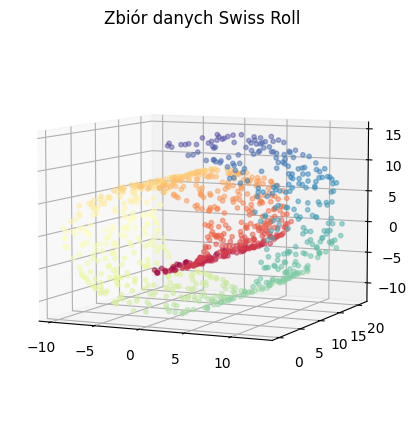

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D


ax = plt.figure(figsize=(15, 5)).add_subplot(projection='3d')

ax.view_init(7, -65)

ax.scatter(
    xs=swiss_roll_X[:, 0],
    ys=swiss_roll_X[:, 1],
    zs=swiss_roll_X[:, 2],
    c=swiss_roll_y,
    cmap="Spectral",
    s=10, 
    alpha=0.5,
)
ax.set(title="Zbiór danych Swiss Roll")

## Zadanie 1.1 (2.5 pkt)
Zbadamy następujące metody redukcji wymiarowości: PCA, MDS, Isomap, t-SNE oraz UMAP. Zaimplementuj poniżej zdefiniowane funkcje, które zastosują podane metody na danych wejściowych `x` zwracając dla każdego punktu jego dwu-wymiarowe rzutowanie. Pamiętaj o przekazaniu dodatkowych argumentów (hiperparameterów) do konstruktora metody (dla Isomap, t-SNE oraz UMAP).

In [8]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, TSNE
from umap import UMAP

def compute_PCA(x: np.ndarray) -> np.ndarray:
    pca = PCA()
    x_reduced = pca.fit_transform(x)
    return x_reduced


def compute_MDS(x: np.ndarray) -> np.ndarray:
    mds = MDS()
    x_reduced = mds.fit_transform(x)
    return x_reduced


def compute_Isomap(x: np.ndarray, n_neighbors: int = 30) -> np.ndarray:
    isomap = Isomap(n_neighbors=n_neighbors)
    x_reduced = isomap.fit_transform(x)
    return x_reduced



def compute_tSNE(x: np.ndarray, perplexity: int = 50) -> np.ndarray:
    tsne = TSNE(perplexity=perplexity)
    x_reduced = tsne.fit_transform(x)
    return x_reduced


def compute_UMAP(x: np.ndarray, n_neighbors: int = 30, min_dist: float = 0.3) -> np.ndarray:
    umap = UMAP(n_neighbors=n_neighbors, min_dist=min_dist)
    x_reduced = umap.fit_transform(x)
    return x_reduced

In [9]:
methods = [
    ("PCA", compute_PCA),
    ("MDS", compute_MDS),
    ("Isomap", compute_Isomap),
    ("t-SNE", compute_tSNE),
    ("UMAP", compute_UMAP)
]

c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


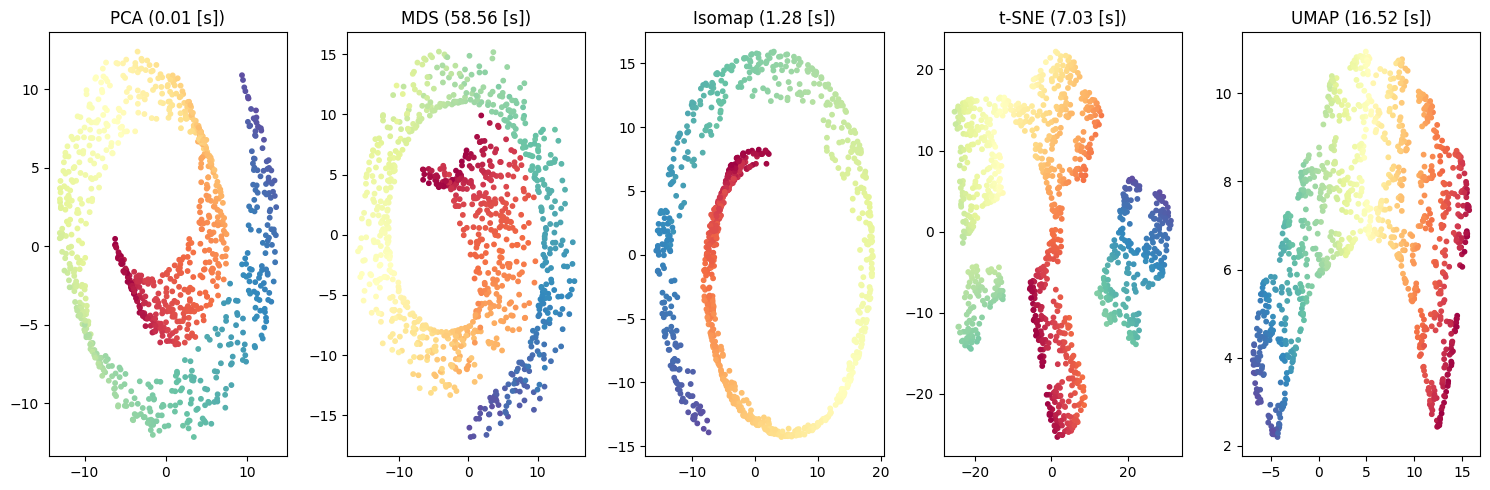

In [10]:
from time import perf_counter


fig, axs = plt.subplots(ncols=len(methods), figsize=(15, 5))


for ax, (name, compute_fn) in zip(axs.ravel(), methods):
    # Apply dimensionality reduction method and measure time
    start = perf_counter()
    z_2d = compute_fn(x=swiss_roll_X)
    end = perf_counter()
    
    # Plot 2-D projections
    ax.scatter(z_2d[:, 0], z_2d[:, 1], c=swiss_roll_y, cmap="Spectral", s=10)
    ax.set(title=f"{name} ({end - start:.2f} [s])")
    
    
fig.tight_layout()

## Zadanie 1.2 (0.25 pkt)
Która z metod twoim zdaniem zadziałała najlepiej? Uzasadnij.

PCA nie działa zbyt dobrze na zbiorze Swiss Roll, ponieważ nie jest w stanie uwzględnić nieliniowych struktur.\
MDS może działać lepiej niż PCA na zbiorze Swiss Roll, ale nadal może mieć trudności z nieliniowymi strukturami.\
Isomap działa dobrze na danych o nieliniowych strukturach, takich jak Swiss Roll.\
Tsne dobrze sobie radzi z skomplikowanymi strukturami danych takimi jak Swiss Roll.\
Umap jest nowoczesną metodą zachowuja lokalne oraz globalne struktury danych.\
W mojej skromnej opinii Isomap zadziała najlepiej ponieważ wynik jej działania dał najabrdziej spłaszczoną reprezentacje.

# 2. Zbiór danych "blobs"
Następnie sprawdzimy zbiór, w którym instancje są opisane przez wysoko-wymiarowe wektory cech - wykorzystamy próbkowanie z wielowymiarowych rozkładów normalnych (funkcja `make_blobs`).

In [11]:
from sklearn.datasets import make_blobs


blobs_X, blobs_y = make_blobs(n_samples=1000, n_features=128, centers=5, random_state=42)

c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 5 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the s

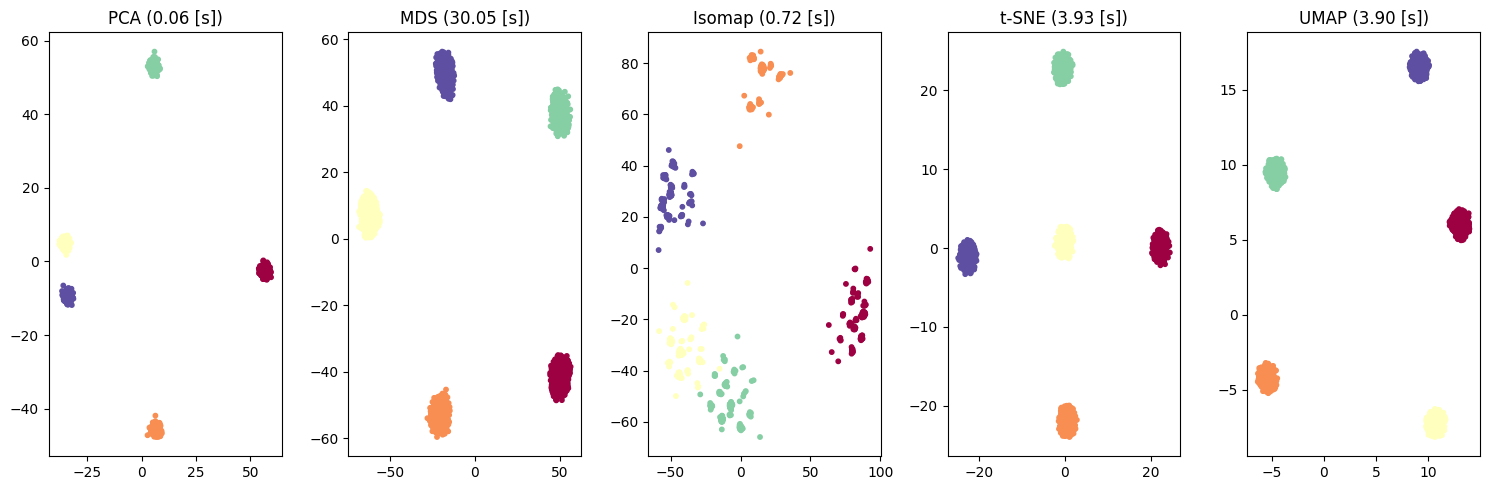

In [12]:
fig, axs = plt.subplots(ncols=len(methods), figsize=(15, 5))


for ax, (name, compute_fn) in zip(axs.ravel(), methods):
    # Apply dimensionality reduction method and measure time
    start = perf_counter()
    z_2d = compute_fn(x=blobs_X)
    end = perf_counter()
    
    # Plot 2-D projections
    ax.scatter(z_2d[:, 0], z_2d[:, 1], c=blobs_y, cmap="Spectral", s=10)
    ax.set(title=f"{name} ({end - start:.2f} [s])")
    
    
fig.tight_layout()

## Zadanie 2.1 (0.25 pkt)
Jak zachowują się zbadane metody w porównaniu do zbioru Swiss Roll?

W przypadku wysokowymiarowych danych, PCA może być bardzo skuteczne w redukcji wymiarowości, ponieważ znajduje kierunki o największej wariancji. W porównaniu do zbioru Swiss Roll, PCA może dawać lepsze wyniki dla tego zbioru.

MDS może także działać lepiej niż na zbiorze Swiss Roll, ponieważ próbuje zachować odległości między punktami w obniżonej przestrzeni. Jednakże, MDS może być mniej efektywny niż PCA dla wysokowymiarowych danych ze względu na czas obliczeń.

Isomap - Isomap może nie dawać tak dobrych wyników jak w przypadku zbioru Swiss Roll, ponieważ ten zbiór nie ma nieliniowych struktur. Mimo to, Isomap może być stosowany do tego rodzaju danych.

t-SNE jest wysoce efektywne dla danych o skomplikowanej strukturze, ale może być mniej efektywne dla wysokowymiarowych danych z prostą strukturą, taką jak w przypadku próbek z wielowymiarowych rozkładów normalnych. W porównaniu do zbioru Swiss Roll, t-SNE może dawać mniej wyraźne wyniki dla tego zbioru.

UMAP - UMAP dobrze radzi sobie z zachowaniem lokalnych i globalnych struktur danych, co może być korzystne w przypadku wysokowymiarowych danych. W porównaniu do zbioru Swiss Roll, UMAP może dawać wyniki o podobnej jakości dla tego zbioru danych.